<a href="https://colab.research.google.com/github/Saumya2005-dot/post-covid-ml-analysis/blob/main/Post_COVID_Effects_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [1]:
import pandas as pd

# Define full paths to your CSVs in Drive
economic_data_path = "/content/drive/MyDrive/ML_COVID_Project/economic_data.csv"
indian_data_path = "/content/drive/MyDrive/ML_COVID_Project/indian_data.csv"

# Load the datasets
df = pd.read_csv(economic_data_path)
df_india = pd.read_csv(indian_data_path)

# Combine both
df_combined = pd.concat([df, df_india], ignore_index=True)



FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ML_COVID_Project/economic_data.csv'

# **1. Load Required Libraries**

In [2]:
!pip install seaborn pandas matplotlib scikit-learn --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ML tools
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score


# **2. Upload the file**

In [3]:
from google.colab import files
uploaded = files.upload()


Saving economics_data.csv to economics_data.csv


# **3. Read the CSV**

In [4]:
import pandas as pd

df = pd.read_csv("economics_data.csv")
df.head()


,country,date,manufacturing pmi,services pmi,consumer confidence,interest rates,cpi yoy,core cpi,unemployment rate,gdp yoy,ticker,open,high,low,close
0,india,01-01-2020,51.3,53.3,94.1,5.15%,7.59%,4.00%,7.06%,3.60%,usdinr,73.52,74.13,74.74,75.35
1,india,01-04-2020,27.4,5.4,55.5,4.40%,5.84%,4.20%,23.50%,-23.90%,usdinr,74.00,74.61,75.22,75.83
2,india,01-07-2020,46.0,34.2,61.7,4.00%,6.73%,5.10%,11.00%,-7.50%,usdinr,73.88,74.57,75.26,75.95
3,india,01-01-2021,57.7,52.8,64.9,4.00%,4.06%,5.60%,6.50%,1.60%,usdinr,74.25,74.89,75.53,76.17
4,india,01-01-2022,54.0,55.5,71.3,4.00%,6.01%,6.00%,7.10%,4.10%,usdinr,73.67,74.38,75.09,75.80


# **4. Data Cleaning & EDA (Exploratory Data Analysis)**

# **4A:Data Cleaning**


In [5]:
# Copy of original data
data = df.copy()

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Remove '%' and convert relevant columns to float
percent_cols = ['interest rates', 'cpi yoy', 'core cpi', 'unemployment rate', 'gdp yoy']
for col in percent_cols:
    data[col] = data[col].str.replace('%', '').astype(float)

# Confirm changes
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   country              437 non-null    object        
 1   date                 437 non-null    datetime64[ns]
 2   manufacturing pmi    437 non-null    float64       
 3   services pmi         437 non-null    float64       
 4   consumer confidence  437 non-null    float64       
 5   interest rates       437 non-null    float64       
 6   cpi yoy              437 non-null    float64       
 7   core cpi             437 non-null    float64       
 8   unemployment rate    437 non-null    float64       
 9   gdp yoy              437 non-null    float64       
 10  ticker               437 non-null    object        
 11  open                 437 non-null    float64       
 12  high                 437 non-null    float64       
 13  low                  437 non-null  

# **4B:Summary Statistics and Missing Values**


In [6]:
# Summary statistics
data.describe()

# Check for missing values
data.isnull().sum()


,0
country,1
date,1
manufacturing pmi,1
services pmi,1
consumer confidence,1
interest rates,1
cpi yoy,1
core cpi,1
unemployment rate,1
gdp yoy,1


In [7]:
print(data[features].isnull().sum())


NameError: name 'features' is not defined

In [8]:
# Fill missing values with column means
data[features] = data[features].fillna(data[features].mean())


NameError: name 'features' is not defined

# **4C: Correlation Heatmap**



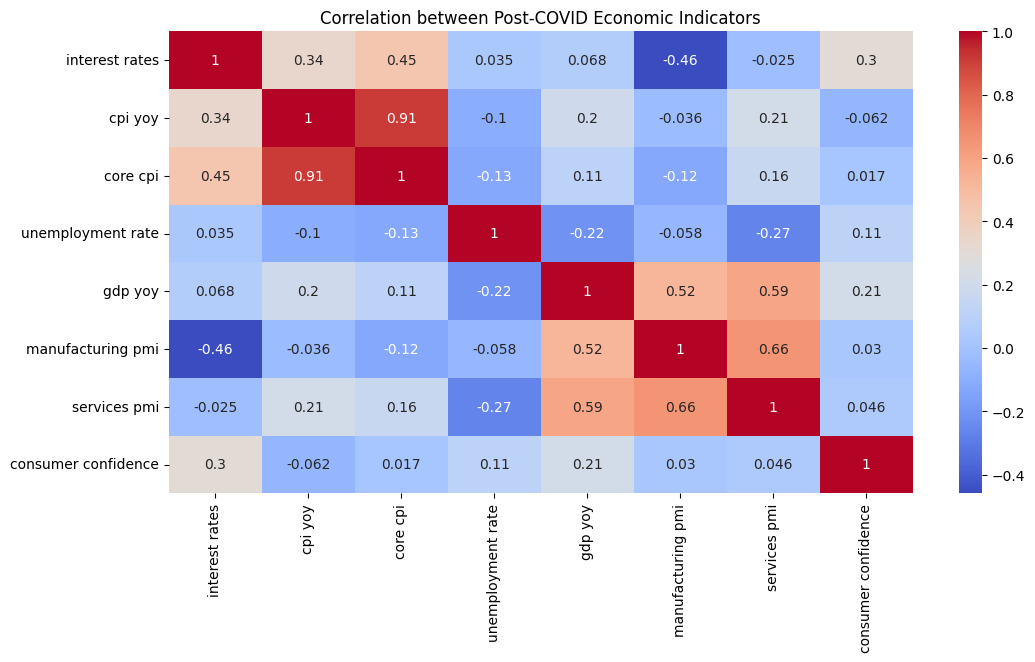

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(data[percent_cols + ['manufacturing pmi', 'services pmi', 'consumer confidence']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation between Post-COVID Economic Indicators")
plt.show()


# **4D: Line Plot – Unemployment & GDP Over Time**

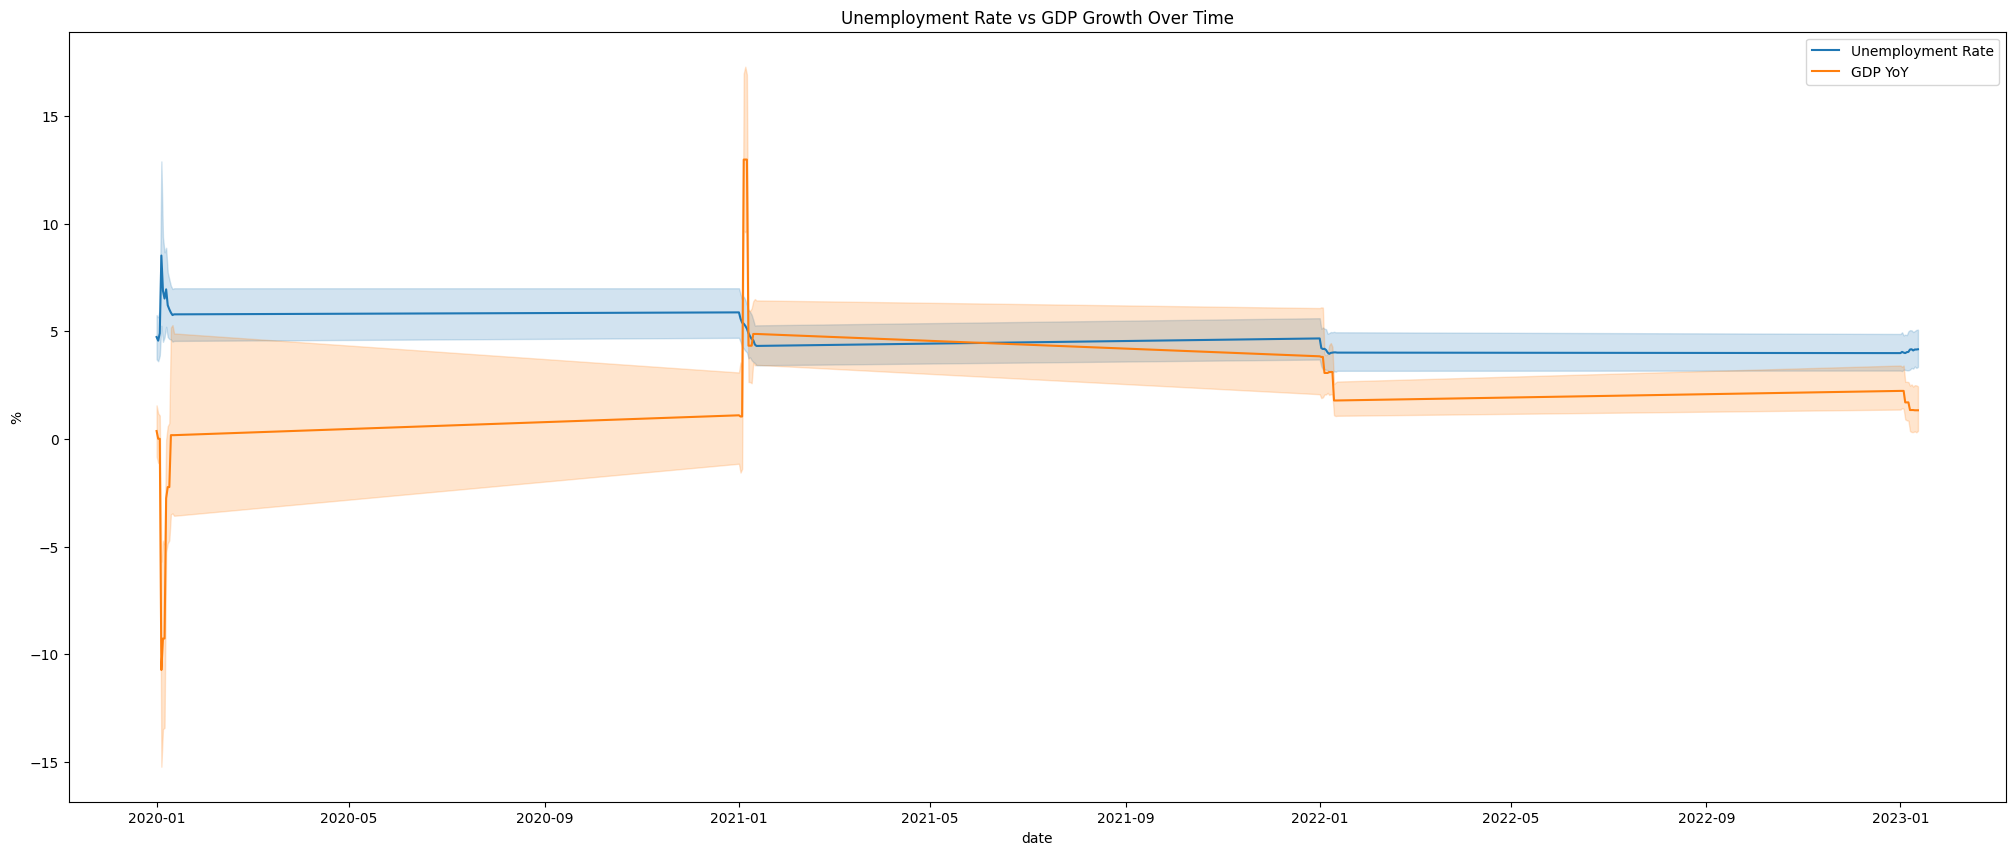

In [ ]:
plt.figure(figsize=(25, 10))
sns.lineplot(x='date', y='unemployment rate', data=data, label='Unemployment Rate')
sns.lineplot(x='date', y='gdp yoy', data=data, label='GDP YoY')
plt.title('Unemployment Rate vs GDP Growth Over Time')
plt.ylabel('%')
plt.legend()
plt.show()


## **5. Machine Learning Modeling**

# **5A: KMeans Clustering — Group similar economic patterns**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)


In [ ]:
# Standardize features
X_scaled = scaler.fit_transform(data[features])

# Apply KMeans
data['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA for 2D visualization
components = pca.fit_transform(X_scaled)


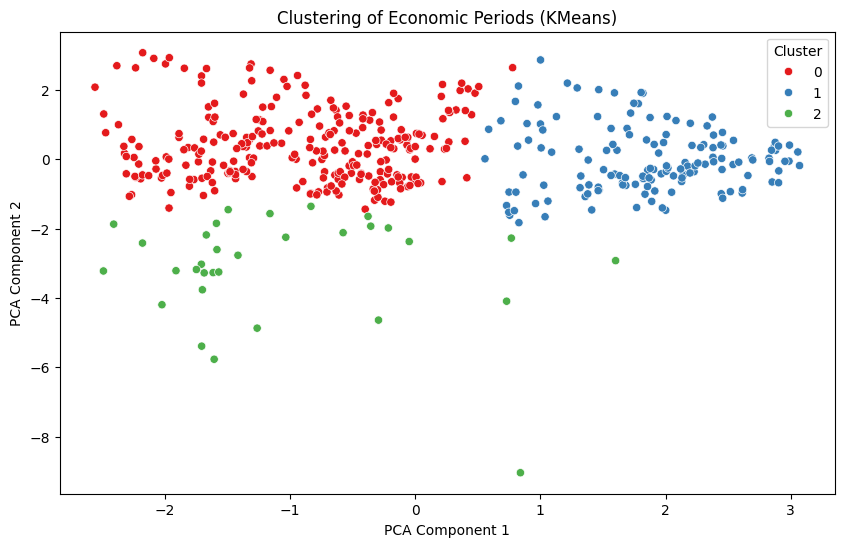

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Features for clustering
features = ['manufacturing pmi', 'services pmi', 'consumer confidence',
            'interest rates', 'cpi yoy', 'core cpi', 'unemployment rate']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA for 2D visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Plot Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=data['Cluster'], palette='Set1')
plt.title('Clustering of Economic Periods (KMeans)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# **5B:Linear Regression — Predict GDP growth**

In [ ]:
data = data.dropna(subset=['gdp yoy'])


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Prepare data
X = data[features]
y = data['gdp yoy']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")


R² Score: 0.46
RMSE: 3.72


# **5C: Plot Actual vs Predicted GDP**

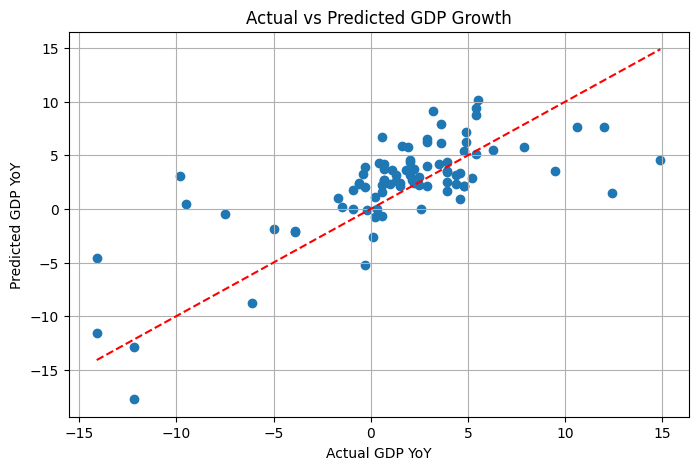

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual GDP YoY')
plt.ylabel('Predicted GDP YoY')
plt.title('Actual vs Predicted GDP Growth')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()



**Train Model (Random Forest Regressor)**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.7418912764213413
MSE: 6.642481329545455


## **Show Feature Importance**

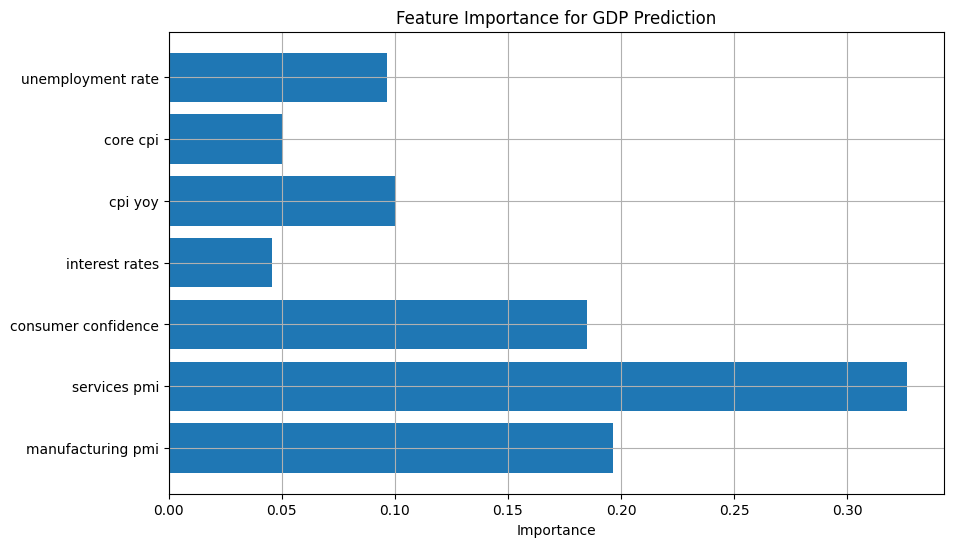

In [ ]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.title('Feature Importance for GDP Prediction')
plt.grid()
plt.show()


**Linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Linear Regression R² Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression R² Score: 0.46133665452781647
Linear Regression MSE: 13.862612489806287


**Visualize Prediction vs Actual**

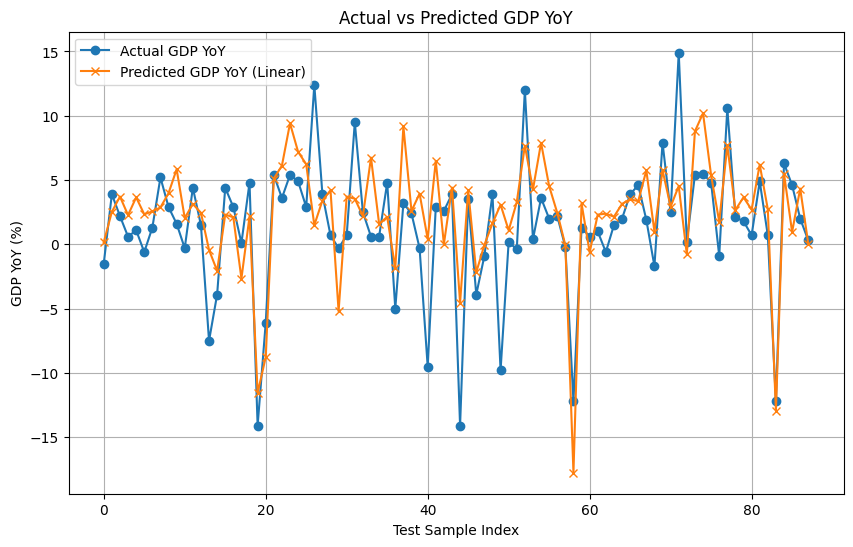

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual GDP YoY', marker='o')
plt.plot(y_pred_lr, label='Predicted GDP YoY (Linear)', marker='x')
plt.title('Actual vs Predicted GDP YoY')
plt.xlabel('Test Sample Index')
plt.ylabel('GDP YoY (%)')
plt.legend()
plt.grid(True)
plt.show()


# **Save model to file**

In [ ]:
import joblib

# Save Linear Regression model
joblib.dump(lr_model, 'gdp_linear_model.pkl')

# Save the scaler too for future use
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


# **Download on computer**

In [ ]:
from google.colab import files
files.download('gdp_linear_model.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Collective graph generation ( for report )**

In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df = df.sort_values(by='date')


In [ ]:
# Remove percentage sign and convert to float
df['gdp yoy'] = df['gdp yoy'].str.replace('%', '').astype(float)


To Plot GDP Trends Over Time (Multi-country)

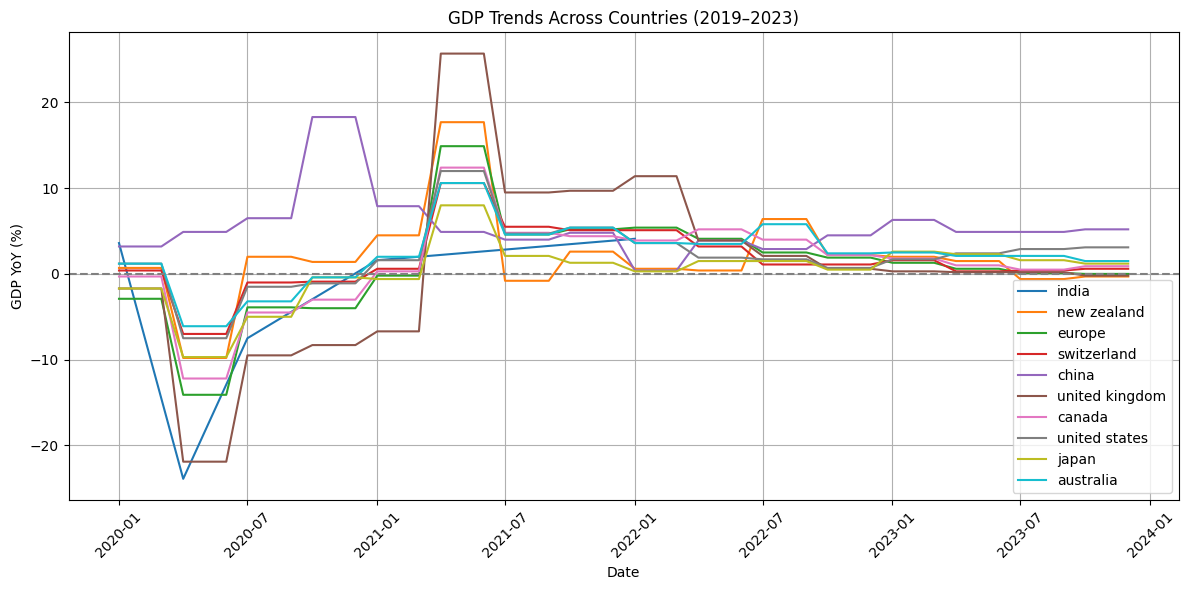

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for country in df['country'].dropna().unique():
    subset = df[df['country'] == country]
    plt.plot(subset['date'], subset['gdp yoy'], label=country)

plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Date')
plt.ylabel('GDP YoY (%)')
plt.title('GDP Trends Across Countries (2019–2023)')
plt.xticks(rotation=45)  # Rotate x-axis date labels
plt.tight_layout()       # Prevent label cutoff
plt.legend()
plt.grid(True)
plt.show()


Unemployment Rate vs GDP YoY (comparative trend)

In [ ]:
# Convert 'unemployment rate' to float
df['unemployment rate'] = df['unemployment rate'].replace('%','', regex=True).astype(float)


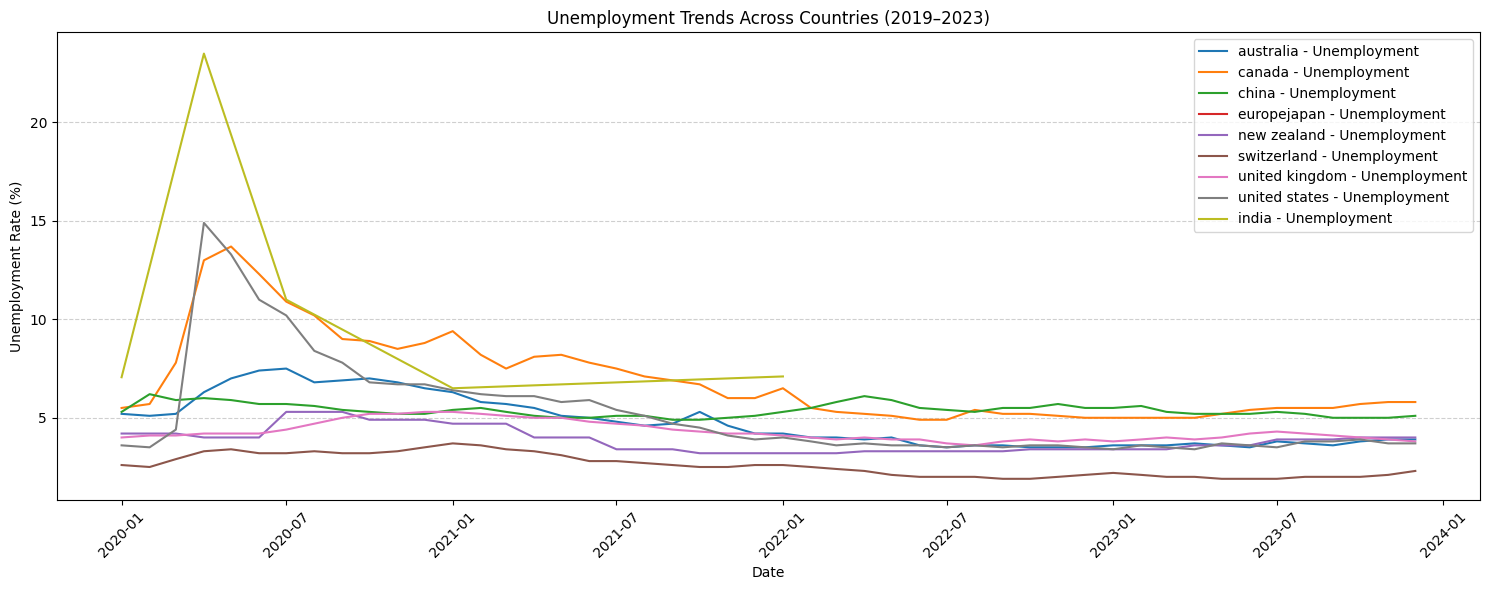

In [ ]:
import matplotlib.pyplot as plt

# Choose a few key countries for clarity
selected_countries = ['australia', 'canada', 'china', 'europe' 'japan', 'new zealand', 'switzerland', 'united kingdom', 'united states', 'india']

plt.figure(figsize=(15,6))
for country in selected_countries:
    subset = df[df['country'] == country]
    plt.plot(subset['date'], subset['unemployment rate'], label=f'{country} - Unemployment')

plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Trends Across Countries (2019–2023)')
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig('Figure_1_2_Unemployment_Trends.png', dpi=300)
plt.show()


GDP YoY Trends for Sample Countries

In [ ]:
import pandas as pd

# Replace the filename below with your uploaded CSV's exact name if different
df = pd.read_csv("economics_data.csv")

# Preview the data
df.head()


,country,date,manufacturing pmi,services pmi,consumer confidence,interest rates,cpi yoy,core cpi,unemployment rate,gdp yoy,ticker,open,high,low,close
0,india,01-01-2020,51.3,53.3,94.1,5.15%,7.59%,4.00%,7.06%,3.60%,usdinr,73.52,74.13,74.74,75.35
1,india,01-04-2020,27.4,5.4,55.5,4.40%,5.84%,4.20%,23.50%,-23.90%,usdinr,74.00,74.61,75.22,75.83
2,india,01-07-2020,46.0,34.2,61.7,4.00%,6.73%,5.10%,11.00%,-7.50%,usdinr,73.88,74.57,75.26,75.95
3,india,01-01-2021,57.7,52.8,64.9,4.00%,4.06%,5.60%,6.50%,1.60%,usdinr,74.25,74.89,75.53,76.17
4,india,01-01-2022,54.0,55.5,71.3,4.00%,6.01%,6.00%,7.10%,4.10%,usdinr,73.67,74.38,75.09,75.80


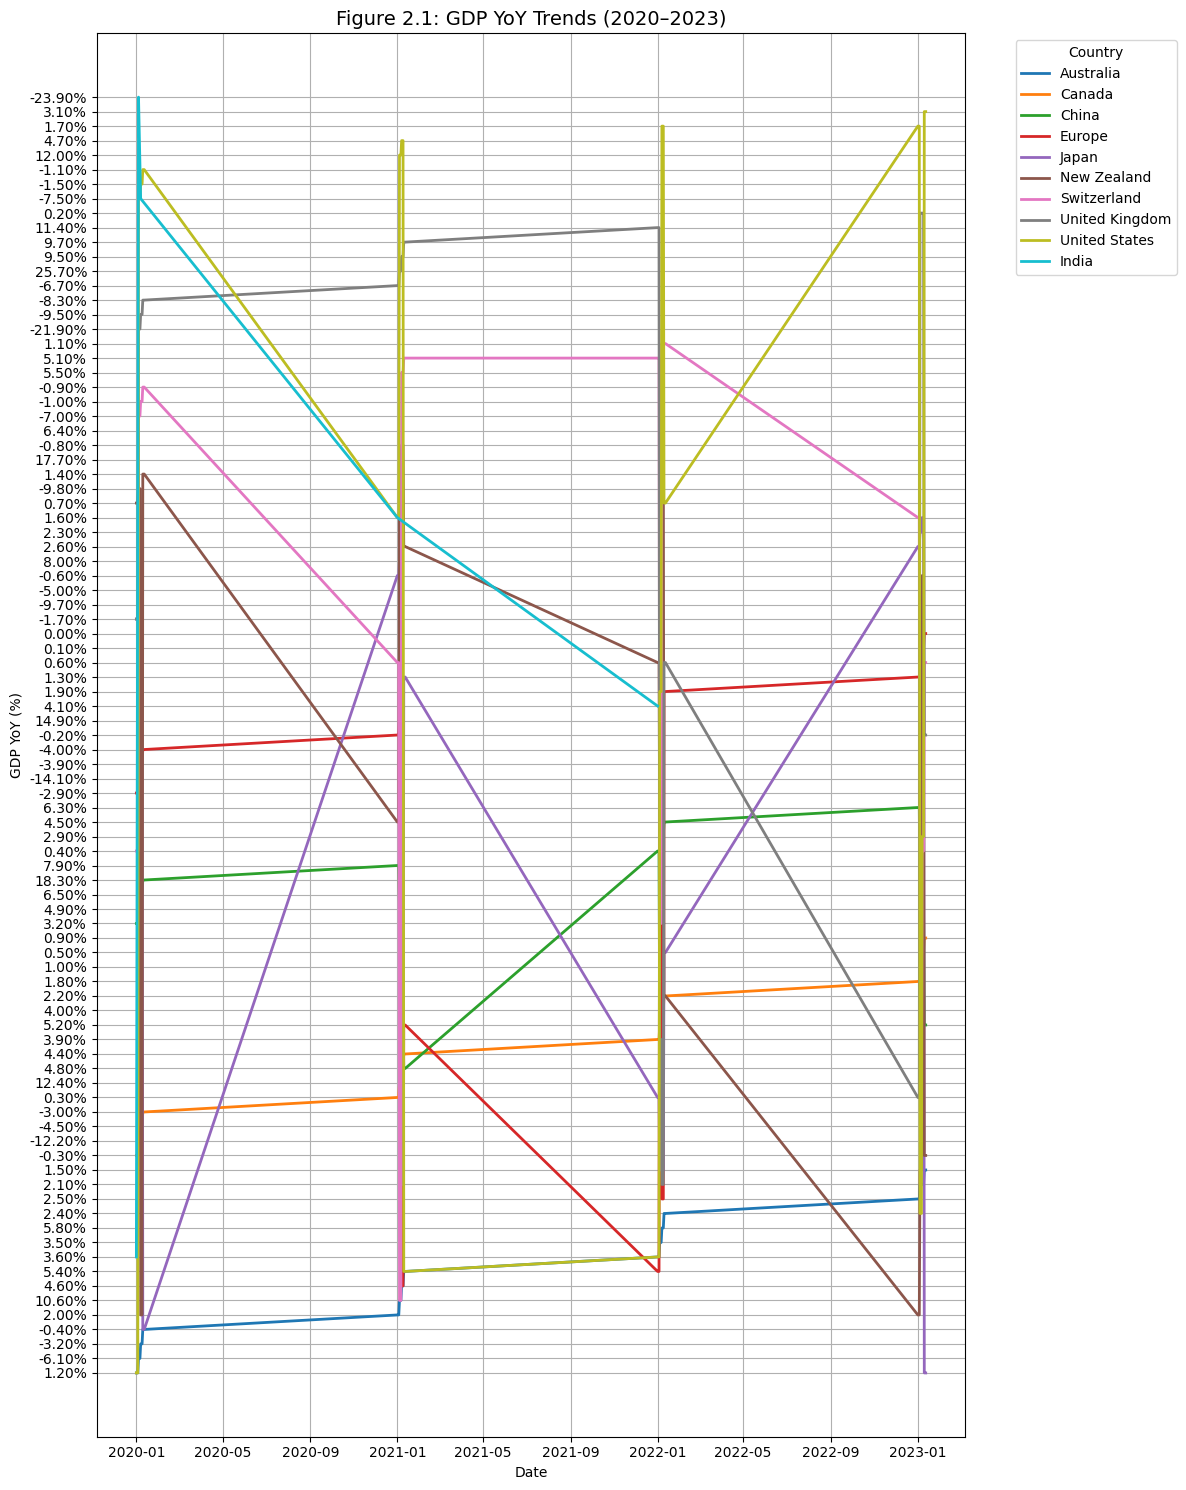

In [ ]:
import matplotlib.pyplot as plt

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Ensure lowercase country names for comparison
df['country'] = df['country'].str.lower()

# Define countries for plotting
sample_countries = ['australia', 'canada', 'china', 'europe', 'japan',
                    'new zealand', 'switzerland', 'united kingdom', 'united states', 'india']

# Plot GDP trends
plt.figure(figsize=(12, 15))
for country in sample_countries:
    subset = df[df['country'] == country]
    if not subset.empty:
        plt.plot(subset['date'], subset['gdp yoy'], label=country.title(), linewidth=2)

plt.title('Figure 2.1: GDP YoY Trends (2020–2023)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('GDP YoY (%)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()





Correlation Heatmap

In [ ]:
# Remove '%' and convert columns to float
cols_to_clean = ['gdp yoy', 'unemployment rate', 'cpi yoy', 'core cpi', 'interest rates',
                 'consumer confidence', 'manufacturing pmi', 'services pmi']

for col in cols_to_clean:
    df[col] = df[col].astype(str).str.replace('%', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')


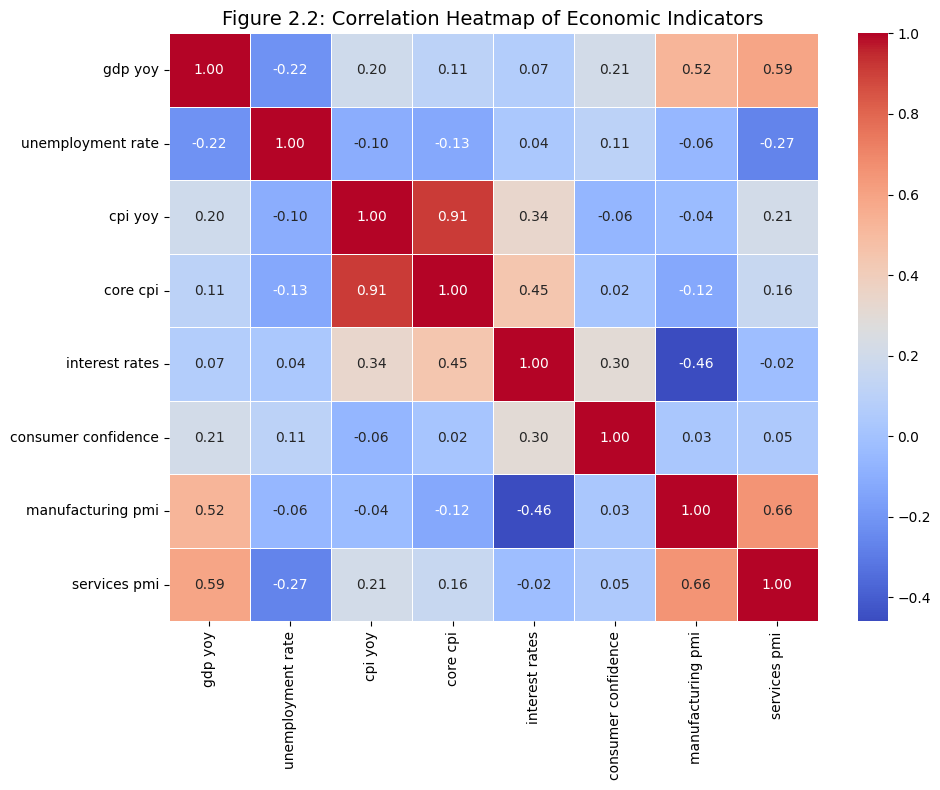

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric economic indicators
numeric_cols = ['gdp yoy', 'unemployment rate', 'cpi yoy', 'core cpi',
                'interest rates', 'consumer confidence', 'manufacturing pmi', 'services pmi']

# Drop rows with NaNs in these columns
heatmap_data = df[numeric_cols].dropna()

# Compute correlation matrix
corr_matrix = heatmap_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Figure 2.2: Correlation Heatmap of Economic Indicators', fontsize=14)
plt.tight_layout()
plt.show()



GDP YoY Trends (Full Country Comparison)

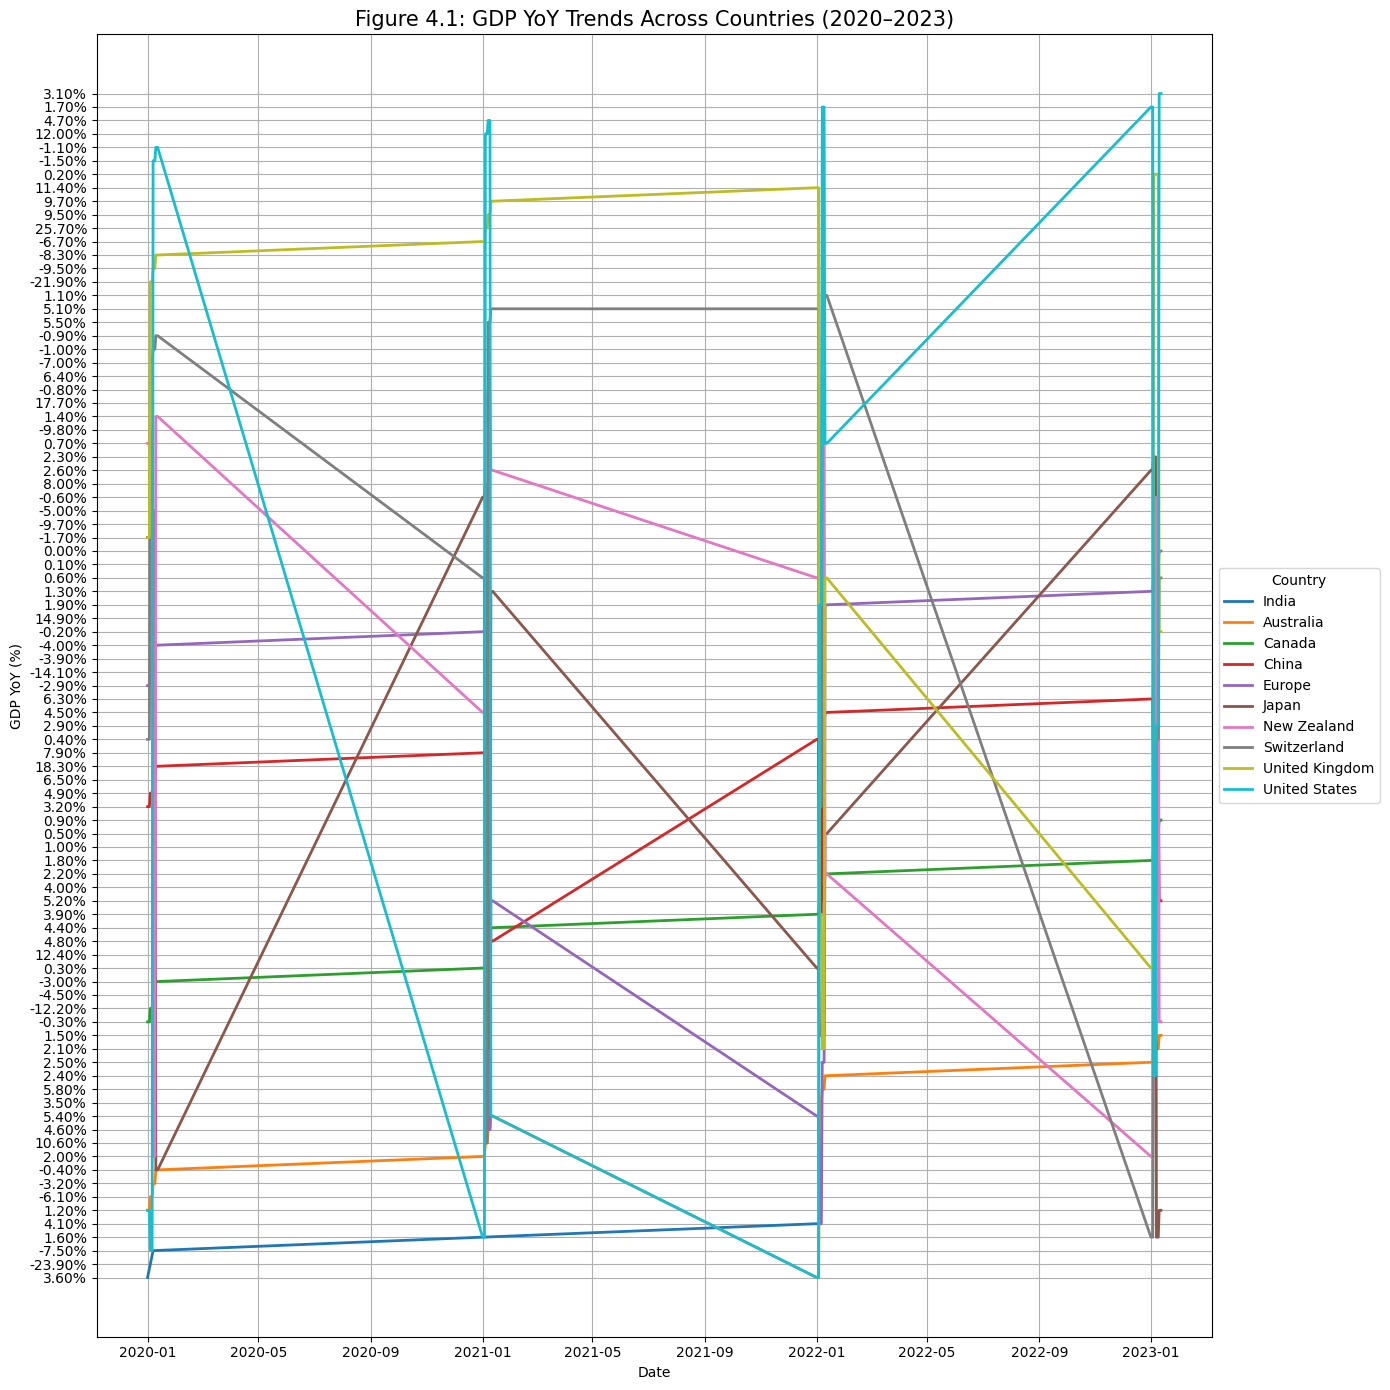

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure date format and country names are cleaned
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['country'] = df['country'].str.strip().str.lower()

# List of all countries present in your dataset
all_countries = df['country'].dropna().unique()

# Create the plot
plt.figure(figsize=(14, 14))

for country in all_countries:
    subset = df[df['country'] == country]
    if not subset.empty:
        plt.plot(subset['date'], subset['gdp yoy'], label=country.title(), linewidth=2)

plt.title('Figure 4.1: GDP YoY Trends Across Countries (2020–2023)', fontsize=15)
plt.xlabel('Date')
plt.ylabel('GDP YoY (%)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


Predicted vs Actual GDP (Linear Regression)

In [16]:
# List of features used in the model
features = ['manufacturing pmi', 'services pmi', 'consumer confidence',
            'interest rates', 'cpi yoy', 'core cpi', 'unemployment rate']

# Remove '%' and convert to float in all feature columns
for col in features + ['gdp yoy']:
    df[col] = df[col].astype(str).str.replace('%', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')


R² Score: 0.46
RMSE: 3.72


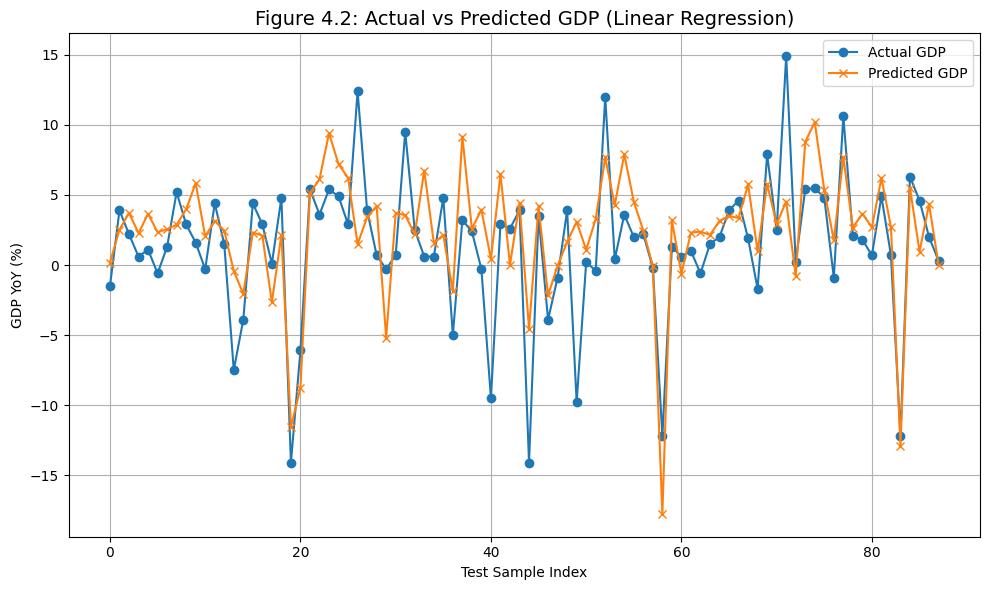

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Select feature columns (ensure no NaNs)
features = ['manufacturing pmi', 'services pmi', 'consumer confidence',
            'interest rates', 'cpi yoy', 'core cpi', 'unemployment rate']

df_clean = df.dropna(subset=features + ['gdp yoy'])

X = df_clean[features]
y = df_clean['gdp yoy']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot Actual vs Predicted GDP
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test.values, label='Actual GDP', marker='o')
plt.plot(range(len(y_pred)), y_pred, label='Predicted GDP', marker='x')
plt.title('Figure 4.2: Actual vs Predicted GDP (Linear Regression)', fontsize=14)
plt.xlabel('Test Sample Index')
plt.ylabel('GDP YoY (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Feature Importance (Random Forest Regressor)

/tmp/ipython-input-3565903862.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


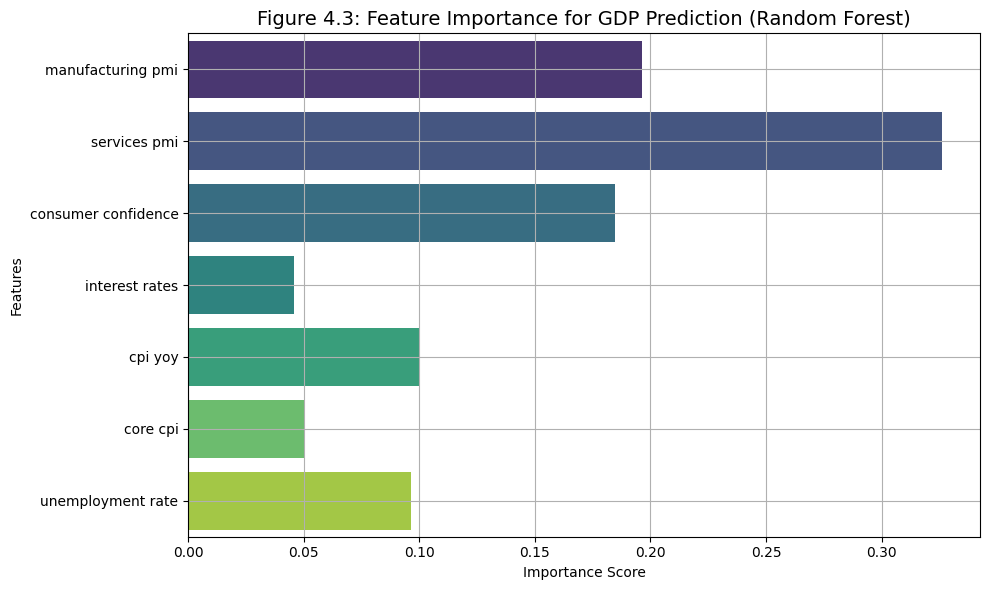

In [18]:
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with NaNs in features or target
df_clean = df.dropna(subset=features + ['gdp yoy'])

X = df_clean[features]
y = df_clean['gdp yoy']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Figure 4.3: Feature Importance for GDP Prediction (Random Forest)', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(True)
plt.tight_layout()
plt.show()


KMeans Clustering of Economic Periods (Visualized with PCA)

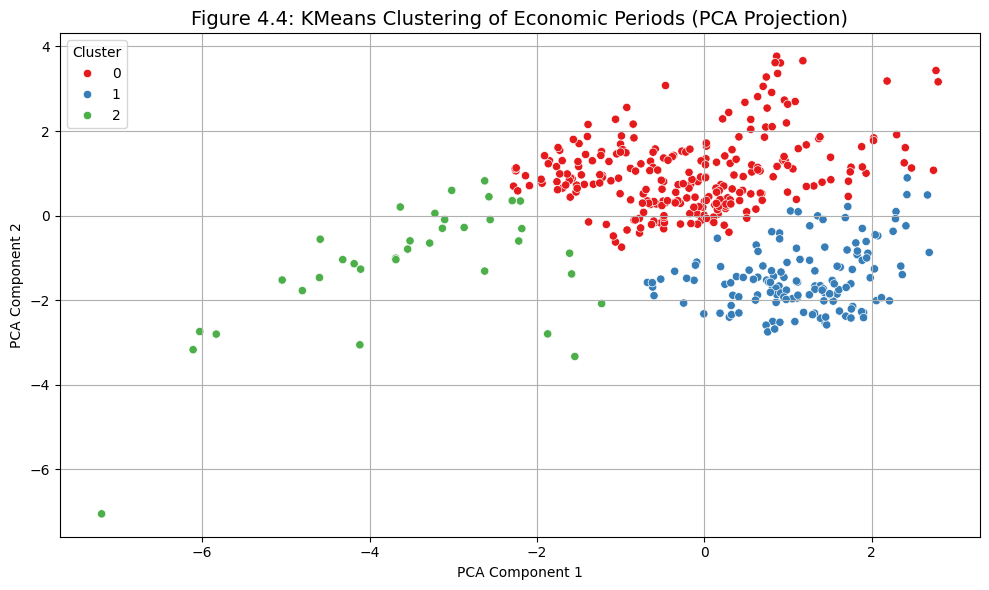

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Prepare data for clustering
cluster_features = ['manufacturing pmi', 'services pmi', 'consumer confidence',
                    'interest rates', 'cpi yoy', 'core cpi', 'unemployment rate', 'gdp yoy']

# Clean and drop rows with missing values
df_cluster = df.dropna(subset=cluster_features).copy()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[cluster_features])

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Plot PCA scatter plot with cluster color
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df_cluster['Cluster'], palette='Set1')
plt.title('Figure 4.4: KMeans Clustering of Economic Periods (PCA Projection)', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()
